<a href="https://colab.research.google.com/github/draxmn/TwinCat-Training/blob/main/Copy_of_Aruco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-contrib-python

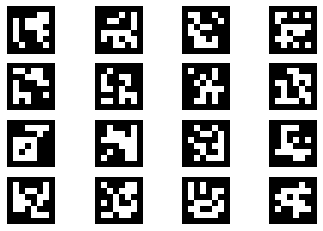

In [ ]:
import cv2
import cv2.aruco as aruco 
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 4
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.show()




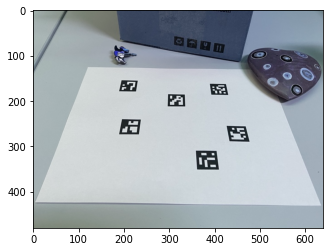

In [ ]:
frame = cv2.imread("down1.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

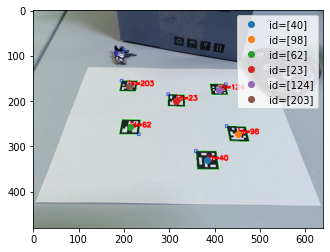

In [ ]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [ ]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product(
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]],
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1     c2     c3     c4     m1     m2     m3     m4       o
marker                                                                  
23     x  298.0  334.0  335.0  297.0  316.0  334.5  316.0  297.5  316.00
       y  185.0  186.0  212.0  211.0  185.5  199.0  211.5  198.0  198.50
40     x  359.0  404.0  410.0  362.0  381.5  407.0  386.0  360.5  383.75
       y  310.0  310.0  350.0  350.0  310.0  330.0  350.0  330.0  330.00
62     x  233.0  190.0  196.0  237.0  211.5  193.0  216.5  235.0  214.00
       y  273.0  273.0  241.0  241.0  273.0  257.0  241.0  257.0  257.00
98     x  427.0  469.0  477.0  434.0  448.0  473.0  455.5  430.5  451.75
       y  255.0  256.0  289.0  288.0  255.5  272.5  288.5  271.5  272.00
124    x  425.0  430.0  394.0  390.0  427.5  412.0  392.0  407.5  409.75
       y  163.0  186.0  186.0  162.0  174.5  186.0  174.0  162.5  174.25
203    x  195.0  230.0  227.0  190.0  212.5  228.5  208.5  192.5  210.50
       y  155.0  155.0  178.0  178.0  155.0  166.5  178.0  166.5  166.50

In [ ]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

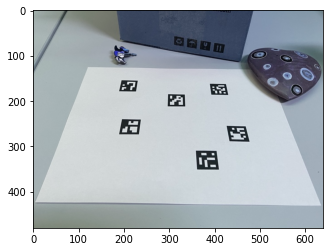

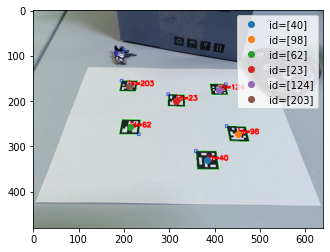

In [ ]:
frame = cv2.imread("down1.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()
for fname in glob.glob('aruco.jpg'):
    img = cv2.imread(fname)
if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

        # Find the rotation and translation vectors.
        rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)

        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

        img = draw(img,corners2,imgpts)
        cv2.imshow('',img)
        k = cv2.waitKey(0) & 0xff
        if k == 's':
            cv2.imwrite(fname[:6]+'.png', img)

cv2.destroyAllWindows()